---
title: "filtering 2"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
import concurrent.futures
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import math
import scipy
from scipy.signal import find_peaks
from scipy.signal import sosfiltfilt, butter

# %matplotlib widget

The subject of frequency filtering and signal processing is an integral part of our day to day life. It is being used in audio processing, wired and wireless communication, electronics and many more. So, obviously there are many tools in python to apply such filters.  

Its Important to note that the manual filtering method we applied in the previous notebook is rarely used as the sharp cuts in the frequencies introduce undesired "ringing" (Gibbs phenomenon) ([more info](https://en.wikipedia.org/wiki/Ringing_artifacts)). Many different filters have been developed to overcome this phenomenon by moderating the "cut". Here are a few famous ones:
![](filter_types.png).

In this notebook, we will be using the butterworth filter from the `scipy.signal.butter` package. Later we will need to specify the order for the filter. What does that mean? The order controls the slope of the decent in the filter as seen here:

<!-- Quarto can't convert svg when rendering the website -->
<!-- ![](Normalized-Butterworth-Filters-Frequency-Response.svg) -->

Text(1.2, 0.8, 'Gain$=\\frac{1}{\\sqrt{1+\\omega^{2n}}}$')

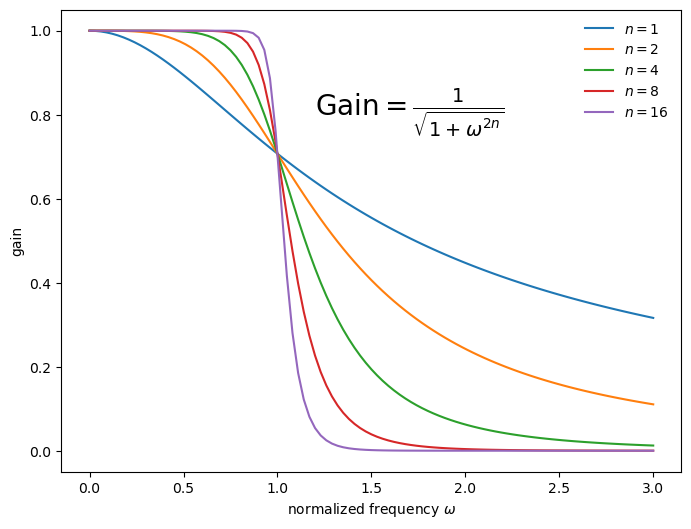

In [15]:
def bw(omega, n):
    return 1.0 / np.sqrt(1.0 + omega**(2*n))

fig, ax = plt.subplots(1, figsize=(8,6))
omega = np.linspace(0.0,3.0,101)
n_list = [1, 2, 4, 8, 16]
for n in n_list:
    ax.plot(omega, bw(omega, n), label=fr"$n={n}$")
ax.legend(frameon=False)
ax.set(xlabel=r"normalized frequency $\omega$",
       ylabel="gain")
ax.text(1.2, 0.8, r"Gain$=\frac{1}{\sqrt{1+\omega^{2n}}}$", fontsize=20)

Import data

In [2]:
df = pd.read_csv('shani_temperature.csv', index_col='datetime', parse_dates=True)
df

,T
datetime,
2000-01-01 00:00:00,16.791667
2000-01-01 02:00:00,16.975000
2000-01-01 04:00:00,16.825000
2000-01-01 06:00:00,17.050000
2000-01-01 08:00:00,19.900000
...,...
2020-12-31 14:00:00,17.341667
2020-12-31 16:00:00,14.900000
2020-12-31 18:00:00,13.308333


plot

In [3]:
x = df['T'].values

## lowpass

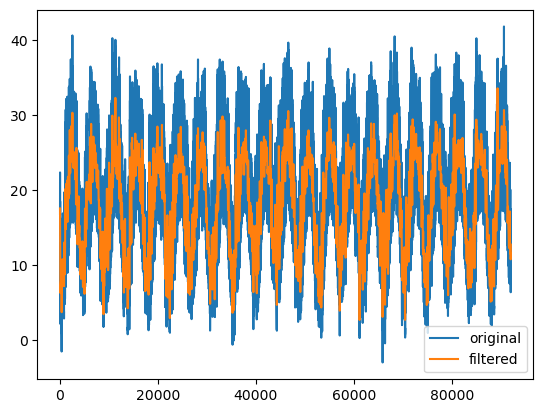

In [4]:
frequency_sample = 0.5 # in units of 1/hr. we choose 0.5 because we sample every 2hrs.
cut_off = 0.005

sos = butter(4,             #filter order = how steep is the slope
             cut_off,       # cutof value in units of the frequency sample
             btype='low',   #type of filter
             output='sos',  # "sos" stands for "Second-Order Sections." 
             fs=0.5         #frequency sample = how many samples per 1 unit.
             )

# apply filter to the data:
y = sosfiltfilt(sos, x) 

fig, ax = plt.subplots()
ax.plot(x, label='original')
ax.plot(y, label='filtered')
ax.legend()


## highpass

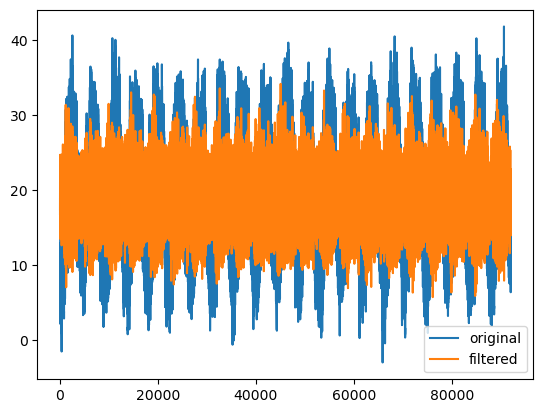

In [5]:
frequency_sample = 0.5 # in units of 1/hr. we choose 0.5 because we sample every 2hrs.
cut_off = 0.005

sos = butter(4,             #filter order = how steep is the slope
             cut_off,       # cutof value in units of the frequency sample
             btype='high',   #type of filter
             output='sos',  # "sos" stands for "Second-Order Sections." 
             fs=0.5         #frequency sample = how many samples per 1 unit.
             )

# apply filter to the data:
y = sosfiltfilt(sos, x) + np.mean(x)

fig, ax = plt.subplots()
ax.plot(x, label='original')
ax.plot(y, label='filtered')
ax.legend()


## bandpass

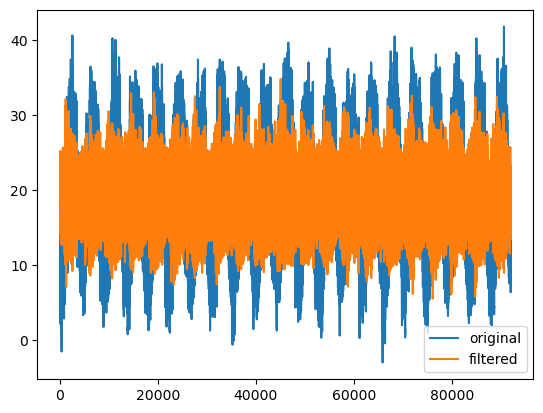

In [6]:
frequency_sample = 0.5 # in units of 1/hr. we choose 0.5 because we sample every 2hrs.
cut_off = 0.005
low = 0.005
high = 0.1

sos = butter(4,             #filter order = how steep is the slope
             [low, high],       # cutof value in units of the frequency sample
             btype='band',   #type of filter
             output='sos',  # "sos" stands for "Second-Order Sections." 
             fs=0.5         #frequency sample = how many samples per 1 unit.
             )

# apply filter to the data:
y = sosfiltfilt(sos, x) + np.mean(x)

fig, ax = plt.subplots()
ax.plot(x, label='original')
ax.plot(y, label='filtered')
ax.legend()


## bandstop

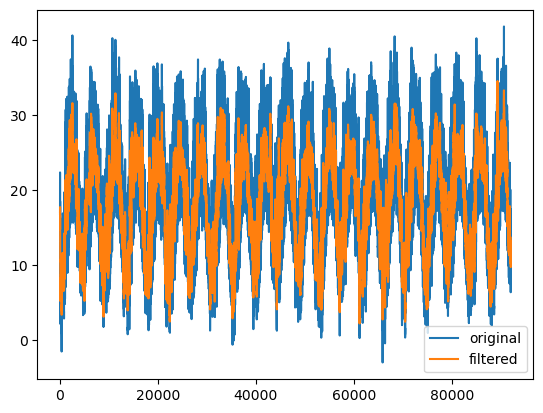

In [7]:
frequency_sample = 0.5 # in units of 1/hr. we choose 0.5 because we sample every 2hrs.
cut_off = 0.005
low = 0.005
high = 0.1

sos = butter(4,             #filter order = how steep is the slope
             [low, high],       # cutof value in units of the frequency sample
             btype='bandstop',   #type of filter
             output='sos',  # "sos" stands for "Second-Order Sections." 
             fs=0.5         #frequency sample = how many samples per 1 unit.
             )

# apply filter to the data:
y = sosfiltfilt(sos, x)

fig, ax = plt.subplots()
ax.plot(x, label='original')
ax.plot(y, label='filtered')
ax.legend()
